# Optimal Control

Understanding the fundamentals of optimal control is important before moving onto reinforcement learning. Classical control has been researched thoroughly with the robustness and behaviour well understood. 

## Dicrete-time

### Dynamics

$$x_{k+1} = f(x_k, u_k), \text{ where } f(x, u) = Ax + Bu \text{ for example} $$

### Trajectory

Given $x_0$, each input sequence, $u_0$, $u_1$, ... ,$u_{h-1}$, generates a state sequence $x_0$, $x_1$, ... ,$x_h$.

### Cost Function

$$J(x_0, u_0, u_1, ... ,u_{h-1}) = \sum^{h-1}_{k=0} c(x_k, u_k) + J_h(x_h)$$

where $c(x_k, u_k)$ is the stage cost and $J_h(x_h)$ is the terminal cost.

### Objective

$$\begin{align*}
J^*(x_0) &= J(x_0, u_0^*, u_1^*, ..., u_{n-1}^*) \\
&= \min_{u_0,u_1,...,u_{n-1}} J(x_0, u_0, ..., u_{n-1})
\end{align*}$$

### Bellman's Principle of Optimality

$$V(x, k) \triangleq \min_{u_k,u_{k+1},...,u_{h-1}} \left(\sum_{i=k}^{h-1} c(x_i, u_i) + J_h(x_h)\right)$$

$V(x, k)$ is the value function or cost-to-go

$$\begin{align*}
V(x, k) &= \min_{u_k,u_{k+1},...,u_{h-1}} \left(\sum_{i=k}^{h-1} c(x_i, u_i) + J_h(x_h)\right) \\
&= \min_{u_k,u_{k+1},...,u_{h-1}} \left(c(x_k, u_k) + \sum_{i=k+1}^{h-1} c(x_i, u_i) + J_h(x_h)\right) \\
&= \min_{u_k} \left(\min_{u_{k+1},...,u_{h-1}} \left(c(x_k, u_k) + \sum_{i=k+1}^{h-1} c(x_i, u_i) + J_h(x_h)\right)\right) \\
&= \min_{u_k} \left(c(x_k, u_k) + \min_{u_{k+1},...,u_{h-1}} \left(\sum_{i=k+1}^{h-1} c(x_i, u_i) + J_h(x_h)\right)\right) \\
&= \min_{u_k}(c(x_k, u_k) + V(x_{k+1}, k + 1))
\end{align*}$$

where $V(x, h) = J_h(x)$ and $ V(x_0, 0) = J^*(x_0)$

### Optimal Input

$$g(x, k) = \arg\min_u(c(x, u) + V(f(x, u), k + 1))$$

Then the optimal control is given by

$$u_k^* = g(x_k, k), \quad k = 0, 1, ..., h-1.$$


### Example: Linear Quadratic Regulator 

$$x_{k+1} = Ax_k + Bu_k $$

$$J(x_0, u_0, u_1, ... ,u_{h-1}) = \sum^{h-1}_{k=0} \left( x^T_kQx_k + u^T_kRu_k \right) + x^T_hX_hx_h$$

$Q$, $R$, $X_h$ are symmetric matrices with $Q \geq 0$, $R > 0$ and $X_h \geq 0$.

$$V(x, k) = \min_{u} \left(  x^TQx + u^TRu + V(Ax+Bu, k+1)\right) $$

so 

$$\begin{align*}
V(x, h-1) &= \min_{u} \left(  x^TQx + u^TRu + (Ax+Bu)^TX_h(Ax+Bu)\right) \\
&= \min_{u} \begin{bmatrix}x^T & u^T\end{bmatrix} \begin{bmatrix}Q + A^T X_h A & A^T X_h B \\ B^T X_h A & R + B^T X_h B\end{bmatrix} \begin{bmatrix}x \\ u\end{bmatrix}
\end{align*}$$

Lemma 1: Minimisation of quadratic forms

$$\min_u \begin{bmatrix}x^T & u^T\end{bmatrix} \begin{bmatrix}Q & S^T \\ S & R\end{bmatrix} \begin{bmatrix}x \\ u\end{bmatrix} = x^T(Q - S^TR^{-1}S)x$$

and the minimum is achieved at

$$u = -R^{-1}Sx.$$

This is simply shown by multiplying out the matrices, taking the derivative w.r.t. **u** and finding the stationary point.

Therefore the solution to the Dynamic programming equation is given by

$$ u_{h-1} = -(R + B^TX_{h}B)^{-1}B^TX_{h}Ax_{h-1}$$

so

$$\begin{align*}
V(x, h-1) &= x^T (Q + A^TX_hA - A^TX_hB(R + B^TX_{h}B)^{-1}B^TX_{h}A) x \\
          &= x^T X_{h-1} x
\end{align*}$$

Finally

$$\begin{align*}
V(x, h) &= x^T X_{h} x \\
V(x, h-1)  &= x^T X_{h-1} x \\
       & ... \\
V(x, 0)  &= x^T X_{0} x \\
\end{align*}$$

The optimal cost is now given by $x^T X_{0} x$.

Lemma 2:  $X_k >= 0$ for $k=h,h-1,...,0$ if $X_h >= 0$, $Q >= 0$ and $R > 0$.

### Infinite Horizon

In the above section we explored the Discrete-time Finite Horizon case, but in the case of an infinite hoirzon behaviour differs.

The cost function now lacks the X matrix, but this is not fully removed from our solution

$$J(x_0, u_0, u_1, ... ,u_{h-1}) = \sum^{h-1}_{k=0} \left( x^T_kQx_k + u^T_kRu_k \right)$$

We proposes a solution similar to the one above, but now with a singular X matrix. The idea is that the 'terminal cost' for the terms further in the horizon contain an infinite number of terms following the recursion of the dynamic eq. above; hence we represent it as a single matrix as it asumes stationarity with no time influence. 

$$ u_{k} = -(R + B^TXB)^{-1}B^TXAx_{k}$$

Where $X = X^T > 0$ solves the **Discrete Algebraic Riccati Equation**

$$ X = Q + A^TXA - A^TXB(R + B^TXB)^{-1}B^TXA $$



## Continuous-time

### Dynamics

$$\dot{x} = f(x, u), \text{ e.g. } \dot{x} = \sin{x} + u $$

### Trajectory

Given $x_0 \in X$ and a horizon $T \geq 0$, each input function $u(\cdot) : [0,T] \to U$ generates a state trajectory
$x(\cdot) : [0,T] \to \mathbb{R}^n$ such that $x(0) = x_0$ and $\forall t \in [0,T] : x(t) = f(x(t),u(t))$.

### Cost Function

$$J(x_0, u(\cdot)) = \int^T_0 c(x(t), u(t)) + J_T(x_T)$$

where $c(x_k, u_k)$ is the stage cost and $J_h(x_h)$ is the terminal cost.

### Objective

$$\begin{align*}
J^*(x_0) &= J(x_0, u^*(\cdot)) \\
&= \min_{u(\cdot)} J(x_0, u(\cdot))
\end{align*}$$

### Bellman's Principality of Optimality

$$V(x(t), t) \triangleq \min_{u(\cdot)} \left(\int_t^T c(x(\tau), u(\tau)) d\tau + J_T(x(T))\right)$$

following the discrete case, we are able to obtain recursion:

$$\begin{align*}
V(x(t), t) &= \min_{u(\cdot)} \left(\int_t^{t+h} c(x(\tau), u(\tau)) d\tau + \int_{t+h}^T c(x(\tau), u(\tau)) d\tau + J_T(x(T))\right) \\
&= \min_{u(\cdot)} \left(\int_t^{t+h} c(x(\tau), u(\tau)) d\tau + V(x(t+h), t+h)\right)
\end{align*}$$

where $V(x(T), T) = J_T(x(T))$ and $V(x(0), 0) = J^*(x(0))$.

### Optimal Input

first we approximate the continous dynamics

$$x(t+h) = x(t) + f(x(t),u(t))h + \mathcal{O}(h^2)$$

and the incremental cost accumalation

$$\int_t^{t+h} c(x(\tau),u(\tau)) d\tau = c(x(t),u(t))h + \mathcal{O}(h^2)$$

subbing into the Bellman's gives

$$V(x,t) = \min_{u \in U} \left(c(x,u)h + V(x + f(x,u)h, t + h)\right) + \mathcal{O}(h^2)$$

recall that

$$\frac{\partial V}{\partial x} \triangleq \left[\frac{\partial V}{\partial x_1} \quad \frac{\partial V}{\partial x_2} \quad \frac{\partial V}{\partial x_3} \quad \cdots \quad \frac{\partial V}{\partial x_n}\right]$$

therefore 

$$V(x,t) = \min_{u \in U} \left(c(x,u)h + V(x, t) + \frac{\partial V(x, t)}{\partial x} f(x, u) h + \frac{\partial V(x, t)}{\partial t} h \right) + \mathcal{O}(h^2)$$

rearrange to finally give **Hamilton-Jacobi-Bellman PDE**

$$ - \frac{\partial V(x, t)}{\partial t} = \min_{u \in U} \left(c(x,u) + \frac{\partial V(x, t)}{\partial x} f(x, u)  \right) $$

with the boundary condition of $V(x(T), T) = J_T(x(T))$ the optimal input is 

$$ u^*(t) =  \min_{u \in U} \left(c(x,u) + \frac{\partial V(x, t)}{\partial x} f(x, u)  \right)$$

### Example: Linear Quadratic Regulator 

$$ \dot{x} = Ax + Bu $$

$$ c(x, u) = x^T Q x + u^T R u $$

$$ J_T(x) = x^T X_T x $$

Subsituting the above into the Hamilton-jacobi-Bellman equation, we get the following equation


$$ x^T \dot{X(t)} x = \min_u \left( x^T Q x + u^T R u + 2x^TX(t) (Ax + Bu) \right) $$

Using Lemma 1 we get an optimal input

$$ u^*(t) =  -R^{-1}B^TX(t)x(t)$$

Which gives

$$ x^T \dot{X(t)} x = x^T \left( Q + XA +A^TX - XBR^{-1}B^TX  \right) x$$

This is then solved via backward numerical integration

$$ \dot{X(t)} \approx \frac{X(t) - X(t - \Delta t)}{\Delta t} $$


In [ ]:
import numpy as np
from typing import Tuple

def lqr_backwards_sweep(A: np.ndarray, B: np.ndarray, Q: np.ndarray, R: np.ndarray, 
                       XN: np.ndarray, dt: float, trange: np.ndarray) -> np.ndarray:
    """
    Compute backwards integration of the Riccati equation.
    """
    iR = np.linalg.inv(R)
    trange_reverse = np.flip(trange)
    n = A.shape[0]
    Xlog = np.zeros((len(trange), n, n))
    
    idx = len(trange_reverse) - 1
    Xlog[idx] = XN
    X = XN.copy()
    
    for _ in trange_reverse[:-1]:
        idx -= 1
        Xdot = -(Q + X @ A + A.T @ X - X @ B @ iR @ B.T @ X)
        X = X - Xdot * dt
        Xlog[idx] = X
    
    return Xlog

def lqr_forwards_sim(A: np.ndarray, B: np.ndarray, R: np.ndarray, x0: np.ndarray, 
                     Xlog: np.ndarray, dt: float, trange: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Run the system forwards with the computed optimal control.
    """
    iR = np.linalg.inv(R)
    n = x0.shape[0]
    xlog = np.zeros((len(trange), n))
    ulog = np.zeros(len(trange)-1)
    
    idx = 0
    x = x0.reshape(-1)  # Convert to 1D array while preserving values
    xlog[idx] = x
    
    for _ in trange[:-1]:
        X = Xlog[idx]
        u_mat = -iR @ B.T @ X @ x.reshape(-1, 1)
        u = u_mat[0, 0]  # Extract scalar value properly
        ulog[idx] = u
        idx += 1
        dx = (A @ x.reshape(-1, 1) + B * u).reshape(-1) * dt
        x = x + dx
        xlog[idx] = x
    
    return xlog, ulog

def run_lqr_example():
    # State space model
    A = np.array([[0, 1], [4, 0]])
    B = np.array([[1], [-1]])
    C = np.array([[1, 0]])
    
    # Cost function
    Q = C.T @ C
    R = np.array([[1]])
    
    # Terminal costs (two examples)
    XN_1 = 20 * np.eye(2)
    XN_2 = np.zeros((2, 2))
    
    # Discretisation parameters
    dt = 0.001
    T = 4
    trange = np.arange(0, T + dt, dt)
    
    # Backwards sweep
    Xlog_1 = lqr_backwards_sweep(A, B, Q, R, XN_1, dt, trange)
    Xlog_2 = lqr_backwards_sweep(A, B, Q, R, XN_2, dt, trange)
    
    # Forward simulation
    x0 = np.array([[1], [1]])
    xlog_1, ulog_1 = lqr_forwards_sim(A, B, R, x0, Xlog_1, dt, trange)
    xlog_2, ulog_2 = lqr_forwards_sim(A, B, R, x0, Xlog_2, dt, trange)
    
    # Compute optimal costs properly extracting scalar values
    cost_1 = x0.T @ Xlog_1[0] @ x0
    cost_2 = x0.T @ Xlog_2[0] @ x0
    optimal_cost_1 = cost_1[0, 0]
    optimal_cost_2 = cost_2[0, 0]
    
    return trange, Xlog_1, Xlog_2, xlog_1, xlog_2, ulog_1, ulog_2, optimal_cost_1, optimal_cost_2




In [21]:
results = run_lqr_example()

C:\Users\oskar\AppData\Local\Temp\ipykernel_16504\678142727.py:20: RuntimeWarning: overflow encountered in matmul
  Xdot = -(Q + X @ A + A.T @ X - X @ B @ iR @ B.T @ X)
C:\Users\oskar\AppData\Local\Temp\ipykernel_16504\678142727.py:20: RuntimeWarning: invalid value encountered in matmul
  Xdot = -(Q + X @ A + A.T @ X - X @ B @ iR @ B.T @ X)


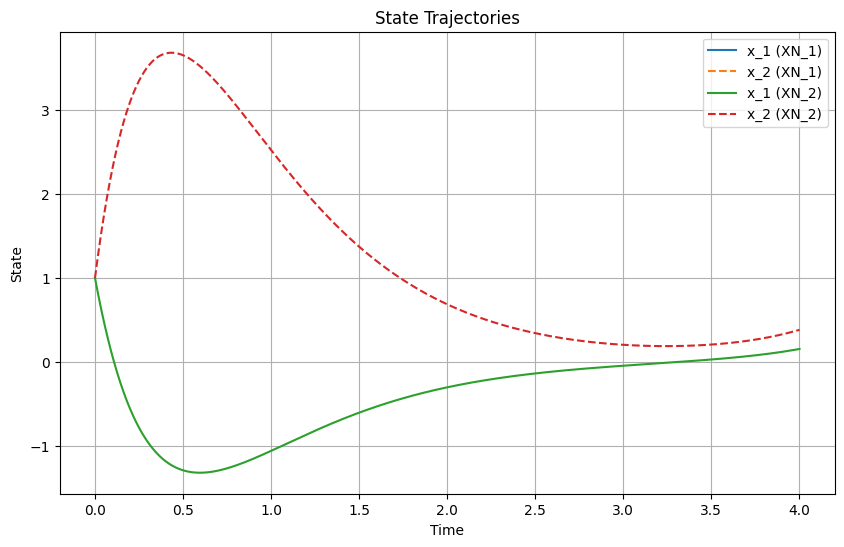

In [22]:
import matplotlib.pyplot as plt

# Extract the time range and xlog values from the results
trange, _, _, xlog_1, xlog_2, _, _, _, _ = results

# Plot xlog_1
plt.figure(figsize=(10, 6))
plt.plot(trange, xlog_1[:, 0], label='x_1 (XN_1)', linestyle='-')
plt.plot(trange, xlog_1[:, 1], label='x_2 (XN_1)', linestyle='--')

# Plot xlog_2
plt.plot(trange, xlog_2[:, 0], label='x_1 (XN_2)', linestyle='-')
plt.plot(trange, xlog_2[:, 1], label='x_2 (XN_2)', linestyle='--')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('State')
plt.title('State Trajectories')
plt.legend()
plt.grid(True)
plt.show()